<a href="https://colab.research.google.com/github/yolia/MPCAS_Course/blob/main/NLP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Basic Text Processing


In [37]:
import numpy as np
from matplotlib import pyplot as plt
import spacy
from spacy import displacy
from collections import defaultdict, Counter
nlp = spacy.load('en_core_web_sm')

In [38]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Library/a1_data
#/content/drive/My Drive/Colab Library/training_data.csv
#!unzip 'drive/My Drive/Colab Library/a1_data.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Library/a1_data


In [39]:
# load english mode in spacy
# step 1 in the workflow tokenization: already done by the data provider
# step 2 word frequencies
#lib
#wikipedia.txt
#books.txt
#europarl.txt
lib = ['wikipedia.txt', 'books.txt', 'europarl.txt']
encode = ['utf-8','ISO-8859-1', 'utf-8']
def count_frequency(file_name, encode):
  freqs = Counter() # counter is a instance
  with open(file_name, encoding = encode) as f:
      for line in f:
          tokens = line.lower().split()
          for token in tokens:
              freqs[token] += 1 
  return freqs

In [41]:
for id in range(3):
  freqs[id] = count_frequency(lib[id], encode[id])
  print(f'10 most common words in {lib[id]} are listed below')   
  print(freqs[id].most_common()[0:10])


10 most common words in wikipedia.txt are listed below
[('the', 3158463), (',', 2566261), ('.', 1956600), ('of', 1534698), ('and', 1260516), ('in', 1205759), ('a', 958283), ('to', 926287), ('-', 548244), ('is', 522101)]
10 most common words in books.txt are listed below
[('the', 2425678), (',', 2064433), ('.', 1958494), ('and', 1367843), ('of', 1321821), ('to', 1159024), ('a', 1103939), ('is', 792900), ('in', 739009), ('i', 704436)]
10 most common words in europarl.txt are listed below
[('the', 3003965), (',', 2115604), ('.', 1536632), ('of', 1422333), ('to', 1341441), ('and', 1158234), ('in', 945160), ('that', 732156), ('a', 674231), ('is', 671969)]


In [47]:
freqs2 =  dict()

In [49]:
# emm, although I don't know what is the "defaultdict"
def red_follower(YOUR_FILE, ENCODING):
  freqs = defaultdict(Counter)
  with open(YOUR_FILE, encoding = ENCODING) as f:
      for line in f:
        tokens = line.lower().split()
        for t1, t2 in zip(tokens, tokens[1:]):
            freqs[t1][t2] += 1
  return freqs


for id in range(3):
  freqs2[id] = red_follower(lib[id], encode[id])
  print(f'10 most common words in {lib[id]} that following "red" are')   
  print(freqs2[id]["red"].most_common()[0:10]) # and it runs forever

10 most common words in wikipedia.txt that following "red" are
[(',', 532), ('sox', 495), ('and', 467), ('-', 454), ('army', 404), ('cross', 278), ('.', 213), ('wings', 208), ('sea', 177), ('river', 166)]
10 most common words in books.txt that following "red" are
[('sox', 198), ('herrings', 175), (',', 132), ('army', 126), ('and', 104), ('riding', 83), ('wine', 75), ('october', 69), ('cross', 65), ('"', 65)]
10 most common words in europarl.txt that following "red" are
[('tape', 856), ('cross', 214), ('card', 54), ('lines', 37), ('and', 26), ('army', 26), ('light', 25), ('line', 23), (',', 22), ('.', 18)]


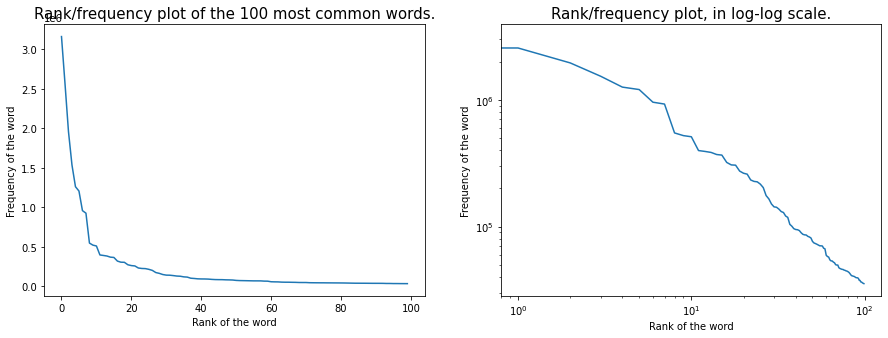

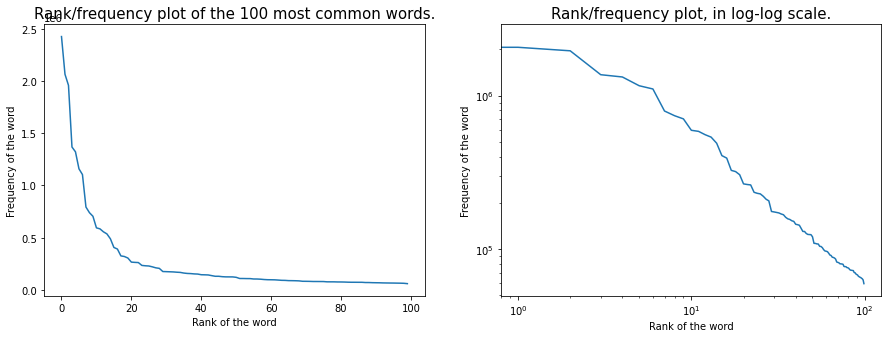

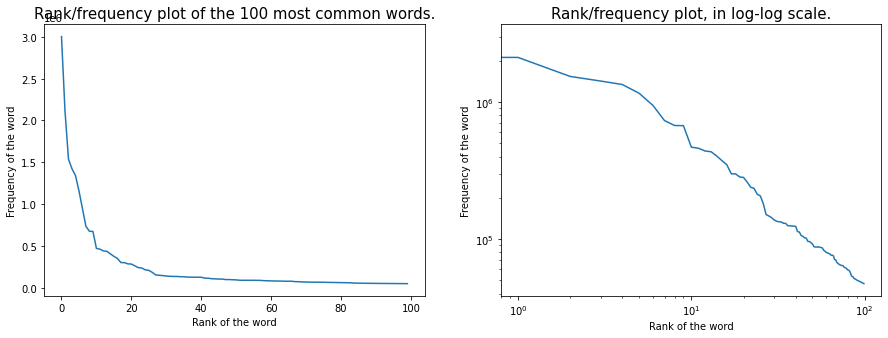

In [46]:
# freq distribution (Zipf's law ?
def plot_rank_frequency(freqs, plot_length):

    fig_size = (15, 5)
    font_size = 15
    x_vec = []
    y_vec = []
    
    common_words = freqs.most_common()[0:plot_length+1]

    for i in range(plot_length):
        x_vec.append(i)
        y_vec.append(common_words[i][1])

    f,(ax1, ax2) = plt.subplots(1, 2, figsize= fig_size)
    ax1.plot(x_vec, y_vec)
    ax1.set_xlabel("Rank of the word")
    ax1.set_ylabel("Frequency of the word")
    ax1.set_title("Rank/frequency plot of the " + str(plot_length) + " most common words.", fontsize = font_size)

    ax2.loglog(x_vec, y_vec)
    ax2.set_xlabel("Rank of the word")
    ax2.set_ylabel("Frequency of the word")
    ax2.set_title("Rank/frequency plot, in log-log scale.", fontsize = font_size)

for id in range(3):
  plot_rank_frequency(freqs[id], 100)
      

#Comparing Corpora

# Preprocessing text for machine learning



# Trying out an NLP toolkit
pipeline:
tokenization
part-of-speech tagging, 
parsing
named entity extraction

In [50]:
example = 'ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.'
result = nlp(example)

In [51]:
displacy.render(result, style='ent', jupyter=True)

In [52]:
displacy.render(result, style='dep', jupyter=True) #OHHHHH

[['ASDF', 'PROPN', 'ASDF', Inc., 'compound'],
 ['Inc.', 'PROPN', 'Inc.', bought, 'nsubj'],
 ['bought', 'VERB', 'buy', bought, 'ROOT'],
 ['two', 'NUM', 'two', companies, 'nummod'],
 ['companies', 'NOUN', 'company', bought, 'dobj'],
 ['last', 'ADJ', 'last', week, 'amod'],
 ['week', 'NOUN', 'week', bought, 'npadvmod'],
 ['.', 'PUNCT', '.', bought, 'punct'],
 ['One', 'NUM', 'one', founded, 'nsubjpass'],
 ['of', 'ADP', 'of', One, 'prep'],
 ['them', 'PRON', '-PRON-', of, 'pobj'],
 ['was', 'AUX', 'be', founded, 'auxpass'],
 ['founded', 'VERB', 'found', founded, 'ROOT'],
 ['by', 'ADP', 'by', founded, 'agent'],
 ['Jane', 'PROPN', 'Jane', XYZ, 'compound'],
 ['XYZ', 'PROPN', 'XYZ', by, 'pobj'],
 ['in', 'ADP', 'in', founded, 'prep'],
 ['2012', 'NUM', '2012', in, 'pobj'],
 ['in', 'ADP', 'in', founded, 'prep'],
 ['Germany', 'PROPN', 'Germany', in, 'pobj'],
 ['.', 'PUNCT', '.', founded, 'punct']]

In [72]:
temp_list = []
for token in result:
  temp_list.append([token.text, token.pos_, token.lemma_, token.head, token.dep_, ])
print(*temp_list, sep = "\n")

['ASDF', 'PROPN', 'ASDF', Inc., 'compound']
['Inc.', 'PROPN', 'Inc.', bought, 'nsubj']
['bought', 'VERB', 'buy', bought, 'ROOT']
['two', 'NUM', 'two', companies, 'nummod']
['companies', 'NOUN', 'company', bought, 'dobj']
['last', 'ADJ', 'last', week, 'amod']
['week', 'NOUN', 'week', bought, 'npadvmod']
['.', 'PUNCT', '.', bought, 'punct']
['One', 'NUM', 'one', founded, 'nsubjpass']
['of', 'ADP', 'of', One, 'prep']
['them', 'PRON', '-PRON-', of, 'pobj']
['was', 'AUX', 'be', founded, 'auxpass']
['founded', 'VERB', 'found', founded, 'ROOT']
['by', 'ADP', 'by', founded, 'agent']
['Jane', 'PROPN', 'Jane', XYZ, 'compound']
['XYZ', 'PROPN', 'XYZ', by, 'pobj']
['in', 'ADP', 'in', founded, 'prep']
['2012', 'NUM', '2012', in, 'pobj']
['in', 'ADP', 'in', founded, 'prep']
['Germany', 'PROPN', 'Germany', in, 'pobj']
['.', 'PUNCT', '.', founded, 'punct']


In [77]:
for entity in result.ents:
    print([entity.text, entity.label_])

['ASDF Inc.', 'ORG']
['two', 'CARDINAL']
['last week', 'DATE']
['One', 'CARDINAL']
['Jane XYZ', 'PERSON']
['2012', 'DATE']
['Germany', 'GPE']


# Trying out an NLP toolkit----My result


In [83]:
example2 = 'Claude Elwood Shannon was an American mathematician, electrical engineer, and cryptographer known as "the father of information theory". Shannon is noted for having founded information theory with a landmark paper, "A Mathematical Theory of Communication", which he published in 1948.'
result2 = nlp(example2)

In [84]:
displacy.render(result2, style='ent', jupyter=True)

In [85]:
displacy.render(result2, style='dep', jupyter=True) #OHHHHH

In [87]:
temp_list2 = []
for token in result2:
  temp_list2.append([token.text, token.pos_, token.lemma_, token.head, token.dep_, ])
print(*temp_list, sep = "\n")

['Claude', 'PROPN', 'Claude', Shannon, 'compound']
['Elwood', 'PROPN', 'Elwood', Shannon, 'compound']
['Shannon', 'PROPN', 'Shannon', was, 'nsubj']
['was', 'AUX', 'be', was, 'ROOT']
['an', 'DET', 'an', mathematician, 'det']
['American', 'ADJ', 'american', mathematician, 'amod']
['mathematician', 'NOUN', 'mathematician', was, 'attr']
[',', 'PUNCT', ',', mathematician, 'punct']
['electrical', 'ADJ', 'electrical', engineer, 'amod']
['engineer', 'NOUN', 'engineer', mathematician, 'conj']
[',', 'PUNCT', ',', engineer, 'punct']
['and', 'CCONJ', 'and', engineer, 'cc']
['cryptographer', 'NOUN', 'cryptographer', engineer, 'conj']
['known', 'VERB', 'know', cryptographer, 'acl']
['as', 'SCONJ', 'as', known, 'prep']
['"', 'PUNCT', '"', as, 'punct']
['the', 'DET', 'the', father, 'det']
['father', 'NOUN', 'father', as, 'pobj']
['of', 'ADP', 'of', father, 'prep']
['information', 'NOUN', 'information', theory, 'compound']
['theory', 'NOUN', 'theory', of, 'pobj']
['"', 'PUNCT', '"', as, 'punct']
['.', 

In [88]:
for entity in result2.ents:
    print([entity.text, entity.label_])

['Claude Elwood Shannon', 'PERSON']
['American', 'NORP']
['Shannon', 'FAC']
['A Mathematical Theory of Communication"', 'WORK_OF_ART']
['1948', 'DATE']
